# K-nearest Neighbors & Decision Trees

By Joe Ganser

Github Repo link: 


**The following data set is the iris flower data set. It basically describes three types the petal sizes of several species of flowers. The graphs are plots of different features from these data sets. See the extra code file on how to generate this plot.**

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)
data = pd.concat([iris['data'],iris['target']],axis=1)
X = data.drop('target',axis=1)
y = data['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


![iris_plots](iris_plots.png)

### Example 1: K-Nearest Neighbors (KNN)

* Using KNN on the iris data set with visualization and grid search.
* Put the features all on the same scale, using `StandardScaler()` to help with modelling
* Split the iris data set into a train and test set
* Put the train set into the grid search
    * Use different values for `neighbors`, `weights` and `p` in the `GridSearchCV`
    * print the best parameters
* Using the best model from grid search, evaluate it's accuracy on the test set 

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

neighbors = [3,5,7,10]
weights = ['uniform','distance']
p=[1,2]
knn_parameters = {'n_neighbors':neighbors,'weights':weights,'p':p}

gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=knn_parameters,cv=3)
gs_knn.fit(X_train,y_train)
print(gs_knn.best_params_)
knn_best = KNeighborsClassifier(**gs_knn.best_params_)
knn_best.fit(X_train,y_train)
y_pred_knn = knn_best.predict(X_test)
print(accuracy_score(y_pred_knn,y_test))

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.9333333333333333


### Example 2: Decisison Trees

* Using decision tree classifier on the iris data set
* Perform the same task as example 1, except this time search through values of `criterion`, `max_depth`,`max_features`
* Print the best decison tree parameters
* Using the best decision tree model from `GridSearchCV`, evaluate it's accuracy on the test data. 
* Visualizing the decision tree classifier using
    * text representation
    * visual graphic representation

In [3]:
from sklearn.tree import DecisionTreeClassifier
criterion=["gini","entropy","log_loss"]
max_depth = [3,5,10,None]
max_features = [None,2,"log2","auto","sqrt"]
dt_parameters = {'criterion':criterion,'max_depth':max_depth,'max_features':max_features}

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=dt_parameters,cv=3)
gs_dt.fit(X_train,y_train)

print(gs_dt.best_params_)
dt_best = DecisionTreeClassifier(**gs_dt.best_params_)
dt_best.fit(X_train,y_train)
y_pred_dt = dt_best.predict(X_test)
print(accuracy_score(y_pred_dt,y_test))

{'criterion': 'gini', 'max_depth': 3, 'max_features': None}
0.9


In [5]:
from sklearn import tree

text_representation = tree.export_text(dt_best,feature_names=iris.feature_names)
print(text_representation)

|--- petal length (cm) <= -0.74
|   |--- class: 0
|--- petal length (cm) >  -0.74
|   |--- petal width (cm) <= 0.72
|   |   |--- petal length (cm) <= 0.90
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  0.90
|   |   |   |--- class: 2
|   |--- petal width (cm) >  0.72
|   |   |--- class: 2



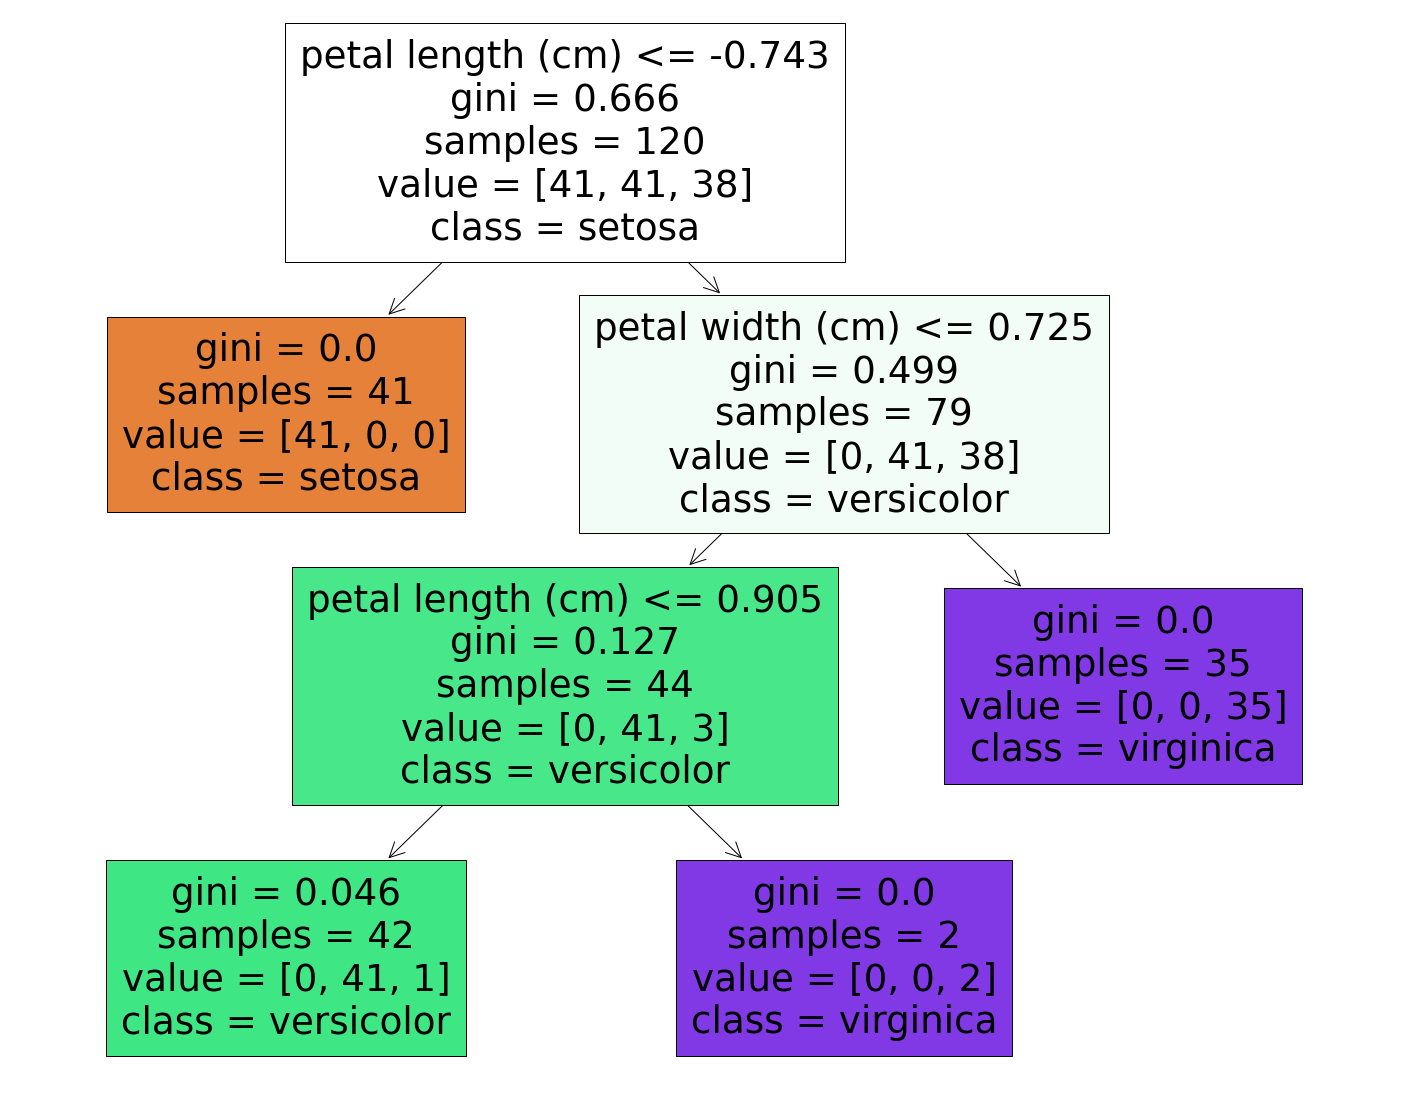

In [6]:
fig = plt.figure(figsize=(25,20))
dt_plot = tree.plot_tree(dt_best, feature_names=iris.feature_names,  class_names=iris.target_names,filled=True)
plt.show()

In [ ]:
#sources; https://mljar.com/blog/visualize-decision-tree/